<a href="https://colab.research.google.com/github/pavang2579/Amazon-campaign-Data-Manipulation-/blob/master/Image_Color_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping from www.booking.com

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [2]:
html = urlopen('https://www.google.com/travel/hotels/Munich/entity/ChcI0Kryw_qIuupIGgsvZy8xdGYyN250cRAB?g2lb=2502548%2C4258168%2C4270442%2C4306835%2C4308227%2C4317915%2C4328159%2C4347306%2C4371335%2C4401769%2C4419364%2C4463263%2C4463666%2C4464737%2C4466981%2C4482194%2C4482438%2C4491423%2C4495816%2C4496891%2C4270859%2C4284970%2C4291517&hl=en-DE&gl=de&un=1&ap=aAE&q=allbusinessschools.com%20hotels&rp=OAFAAEgC&ictx=1&ved=0CAAQ5JsGahcKEwjAvP7y1NLuAhUAAAAAHQAAAAAQAg&utm_campaign=sharing&utm_medium=link&utm_source=htls&ts=CAESABpQCjISLjIkMHg0NzllNzVmOWEzOGM1ZmQ5OjB4MTBjYjg0YTdkYjE5ODdkOgZNdW5pY2gaABIaEhQKBwjlDxACGA4SBwjlDxACGA8YATICEAAqDwoLKAFKAiABOgNFVVIaAA')
bs = BeautifulSoup(html, 'html.parser')
imgs = bs.find_all('img', {'src':re.compile('.jpg')})
for img in imgs: 
    print(img['src']+'\n')\

In [3]:
import requests
import pandas as pd

In [4]:
import pandas as pd
html = urlopen('https://www.booking.com/hotel/de/park-inn-berlin-alexanderplatz.de.html?aid=925773;label=affnetkwankors-link-fr-index-1_pub-393871_site-0_pname-Yieldkit%20FR_clkid-v8f9df39a1lmgr71dr72zulkg5kl8-ai8o2leenb;sid=56a56873e76698ac45ebbe458836de16;all_sr_blocks=6384704_129565388_0_2_0;checkin=2021-02-03;checkout=2021-02-04;dest_id=-1746443;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;highlighted_blocks=6384704_129565388_0_2_0;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;sr_pri_blocks=6384704_129565388_0_2_0__7880;srepoch=1612382882;srpvid=0ec68d90a5a3001c;type=total;ucfs=1&#hotelTmpl')
bs = BeautifulSoup(html, 'html.parser')
imgs = bs.find_all('img', {'src':re.compile('.jpg')})
List_urls = []
for img in imgs: 
    x = img['src']
    List_urls.append(x)
print(List_urls)
df = pd.DataFrame(List_urls)
df.to_csv("List_imageurls.csv")

['https://lh4.googleusercontent.com/-CJC6I7edw7A/AAAAAAAAAAI/AAAAAAAAAQU/W0CJDSHhucE/photo.jpg?sz=64', 'https://lh3.googleusercontent.com/-7FA3xHTXorc/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuckXGovMuzutUYzMkoJkPj1SmoYYpA/s96-c/photo.jpg64', 'https://cf.bstatic.com/images/hotel/max1024x768/177/177862302.jpg', 'https://cf.bstatic.com/images/hotel/max500/237/237248369.jpg', 'https://cf.bstatic.com/images/hotel/max500/133/133953029.jpg', 'https://cf.bstatic.com/images/hotel/max300/478/47871301.jpg', 'https://cf.bstatic.com/images/hotel/max300/177/177706103.jpg', 'https://cf.bstatic.com/images/hotel/max300/222/222646862.jpg', 'https://cf.bstatic.com/images/hotel/max300/232/232534383.jpg', 'https://lh4.googleusercontent.com/-CJC6I7edw7A/AAAAAAAAAAI/AAAAAAAAAQU/W0CJDSHhucE/photo.jpg?sz=64', 'https://lh3.googleusercontent.com/-7FA3xHTXorc/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuckXGovMuzutUYzMkoJkPj1SmoYYpA/s96-c/photo.jpg64', 'https://cf.bstatic.com/xdata/images/xphoto/max240x120/68677908.jpg?k=05edcc73263ccfcd90a

In [5]:
df = pd.read_csv("/content/List_imageurls.csv")
List = list(df["0"])
for i in range(7):
    url = List[i]
    filename = "images_1"+str(i)+".jpg"
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)

In [6]:
open('/content/images_16.jpg')

<_io.TextIOWrapper name='/content/images_16.jpg' mode='r' encoding='UTF-8'>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from PIL import Image
import os

# Pixel Detection

In [ ]:
# pick an image file you have in the working directory
# (or give full path name)
image_file = "/content/images_16.jpg"
img = Image.open(image_file)

In [ ]:
# get the image's width and height in pixels
width, height = img.size
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x200 at 0x7F24A1E65BA8>


# Color Detection

In [ ]:
%matplotlib inline

In [ ]:
image = cv2.imread("/content/images_16.jpg")

In [ ]:
print("The type of this input is {}".format(type(image)))

The type of this input is <class 'numpy.ndarray'>


In [ ]:
print("Shape: {}".format(image.shape))

Shape: (200, 300, 3)


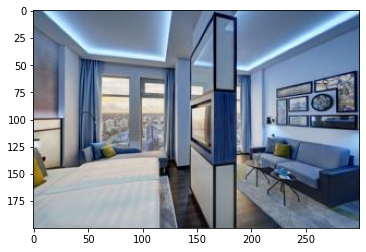

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

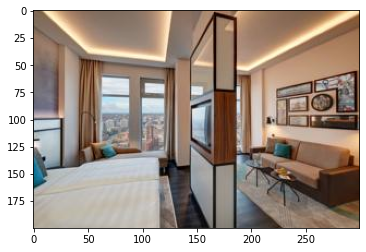

In [ ]:
plt.imshow(image)

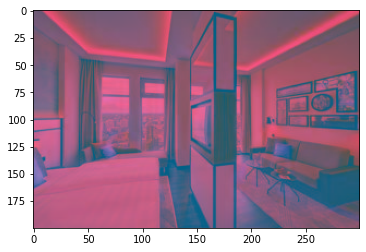

In [ ]:
red_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
plt.imshow(red_image, cmap='pink')

In [ ]:
def RGB2HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([218.11983007, 207.18692319, 192.08491626]),
 array([188.27499802, 166.99357024, 145.27251078]),
 array([145.5711672 , 105.14922241,  63.44879729]),
 array([149.12137398, 149.41006336, 148.25348751]),
 array([74.42098004, 61.6112283 , 47.27097193]),
 array([85.10991971, 92.9128988 , 99.81248679]),
 array([239.34980551, 244.36328275, 246.00695776]),
 array([25.26563168, 21.25904992, 20.96225713])]

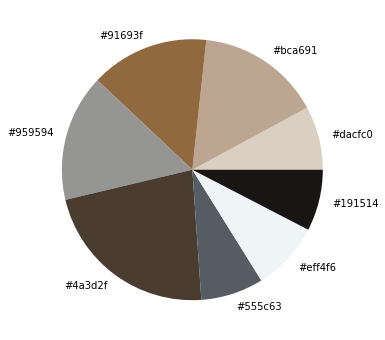

In [ ]:
get_colors(get_image('/content/sample_image.jpeg'), 4, True)

# Edge Detection

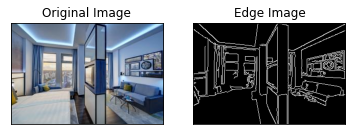

In [ ]:
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/images_16.jpg')
edges = cv2.Canny(img,100,650)



plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()